# MAI ML Contest 1 | Контест 1: Линейная регрессия(for Fedor's groups only)
---
Выполнил: Дударь Юрий Мохсенович, М8О-309Б-22

In [652]:
!pip install mplcyberpunk

## Подключение и настройка модулей  

In [653]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [654]:
plt.style.use("cyberpunk")
pd.options.display.float_format = '{:.6f}'.format
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

## Подключение train, test выборок  

In [655]:
path_to_train = "/content/train.csv"
path_to_test = "/content/test.csv"

In [656]:
train_df = pd.read_csv(path_to_train)
test_df = pd.read_csv(path_to_test)
temp_train_df = pd.read_csv(path_to_train)
temp_test_df = pd.read_csv(path_to_test)

## Анализ Датасета

### Посмотрим на данные

In [657]:
train_df.head(3)

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.000000,66829.000000,549.000000,17290.000000,60.000000,Divorced,1.000000,Rent,1095.000000,0.151985,2.000000,1.000000,0.168542,0.000000,Education,0.000000,23.000000,5.000000,2539.000000,247.000000,50072.000000,15005.000000,5569.083333,0.908289,4.000000,Employed,Associate,4.000000,35067.000000,0.257790,0.251465,508.970230,0.288013,0.000000,66.176500
1,1996-09-23,55.000000,172147.000000,850.000000,16110.000000,36.000000,Widowed,1.000000,Mortgage,211.000000,0.175693,3.000000,0.000000,0.141553,0.000000,Home,0.000000,27.000000,11.000000,844.000000,694.000000,91878.000000,64877.000000,14345.583333,0.797339,2.000000,Employed,High School,33.000000,27001.000000,0.086110,0.093173,514.675859,0.050585,1.000000,28.495737
2,2015-01-19,51.000000,300000.000000,850.000000,38436.000000,36.000000,Married,0.000000,Mortgage,546.000000,0.444605,3.000000,0.000000,0.030987,1.000000,Education,0.000000,21.000000,12.000000,12756.000000,651.000000,292300.000000,13918.000000,25000.000000,0.915945,3.000000,Employed,Bachelor,28.000000,278382.000000,0.108436,0.115443,1268.276385,0.072571,1.000000,34.488104


In [658]:
train_df.info()
print(train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

### Посмотрим распределение таргета

In [659]:
train_df['RiskScore'].value_counts()

,count
RiskScore,
-9999999.000000,121
10000000.000000,94
65.540564,3
67.850406,3
35.133282,3
...,...
55.866106,1
36.507778,1
46.625660,1


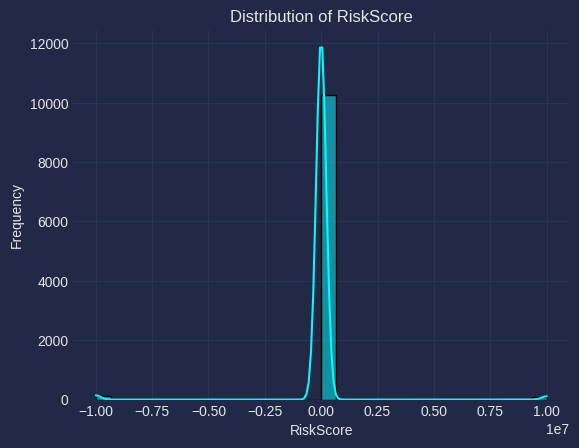

In [660]:
# @title Distribution of RiskScore
sns.histplot(train_df['RiskScore'], bins=30, kde=True)
plt.title('Distribution of RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Frequency')
plt.show()

32.5647484719357, 65.35689774336566, 32.79214927142996, -16.623475435209244, 114.54512165051061


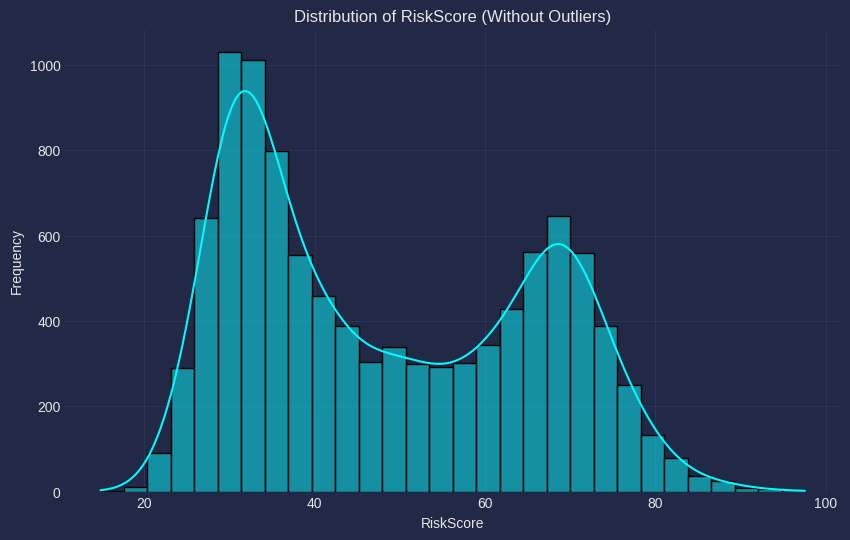

In [661]:
# @title Distribution of RiskScore (Without Outliers)
Q1 = train_df['RiskScore'].quantile(0.25)
Q3 = train_df['RiskScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'{Q1}, {Q3}, {IQR}, {lower_bound}, {upper_bound}')

data_filtered = train_df[(train_df['RiskScore'] >= lower_bound) & (train_df['RiskScore'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['RiskScore'], bins=30, kde=True)
plt.title('Distribution of RiskScore (Without Outliers)')
plt.xlabel('RiskScore')
plt.ylabel('Frequency')
plt.show()

In [662]:
train_df = train_df.loc[~train_df['RiskScore'].isin([-9999999.000000, 10000000.000000])]

### Исследвание недостоющих данных

In [663]:
# @title Исследование недостоющих данных таблица
def missing_values_table(df):

        # Всего недостает
        mis_val = df.isnull().sum()

        # Процент недостающих данных
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Тип данных
        data_types = df.dtypes

        # Таблица с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent, data_types], axis=1)

        # Переименование столбцов
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Data Type'})

        # Сортировка про процентажу
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)


        # Инфо
        print ("В выбранном датафрейме " + str(df.shape[1]) + " столбцов.\n"
            "Всего " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов с неполными данными.")

        # Возврат таблицы с данными
        return mis_val_table_ren_columns

missing_values = missing_values_table(train_df)
missing_values.head(12)

В выбранном датафрейме 36 столбцов.
Всего 36 столбцов с неполными данными.


,Missing Values,% of Total Values,Data Type
NetWorth,1015,9.400000,float64
BaseInterestRate,1015,9.400000,float64
LoanPurpose,1015,9.400000,object
BankruptcyHistory,1015,9.400000,float64
TotalAssets,1015,9.400000,float64
MonthlyDebtPayments,1015,9.400000,float64
CheckingAccountBalance,1015,9.400000,float64
LoanAmount,1015,9.400000,float64
CreditScore,1015,9.400000,float64
InterestRate,530,4.900000,float64


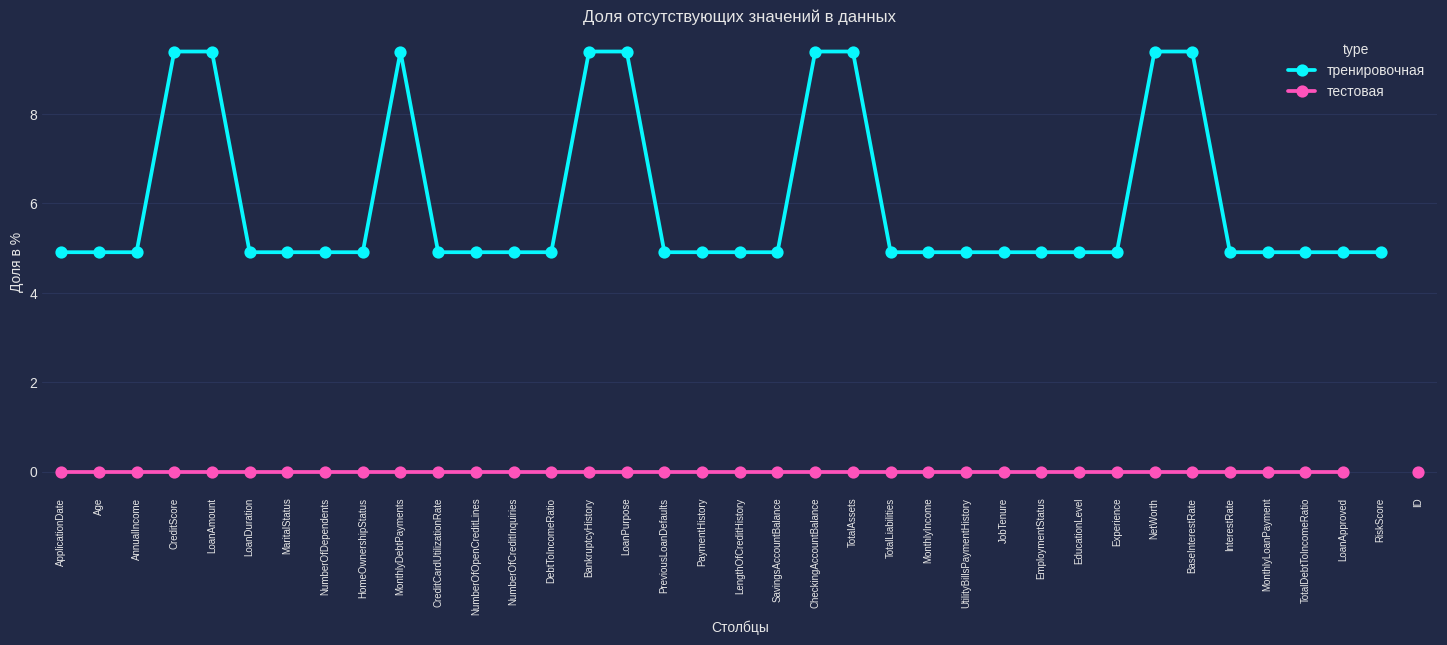

In [664]:
# @title Исследование недостоющих данных график
fig = plt.figure(figsize=(18, 6))

miss_train = pd.DataFrame((train_df.isnull().sum()) * 100 / train_df.shape[0]).reset_index()
miss_train.columns = ['column', 'missing_percentage']
miss_train["type"] = "тренировочная"

miss_test = pd.DataFrame((test_df.isnull().sum()) * 100 / test_df.shape[0]).reset_index()
miss_test.columns = ['column', 'missing_percentage']
miss_test["type"] = "тестовая"

missing = pd.concat([miss_train, miss_test], axis=0)

ax = sns.pointplot(x="column", y="missing_percentage", data=missing, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Доля отсутствующих значений в данных")
plt.ylabel("Доля в %")
plt.xlabel("Столбцы")
plt.show()

#### Интересная закономерность
Количество полей в датасете 11017, при этом видно, что в каждой фиче есть по 530 пропусков. <br>
Гипотеза: в наборе есть 530 нулевых строк <br>
Гипотеза подтвердилась: удалим эти строки

In [665]:
rows_with_all_nan = train_df[train_df.isnull().all(axis=1)]
rows_with_all_nan.shape


(530, 36)

In [666]:
train_df = train_df.dropna(how='all')

##### Проверим изменения

In [667]:
missing_values_test = missing_values_table(train_df)
missing_values_test.head(100)
# print(missing_values_test.index)

В выбранном датафрейме 36 столбцов.
Всего 9 столбцов с неполными данными.


,Missing Values,% of Total Values,Data Type
CreditScore,485,4.700000,float64
LoanAmount,485,4.700000,float64
MonthlyDebtPayments,485,4.700000,float64
BankruptcyHistory,485,4.700000,float64
LoanPurpose,485,4.700000,object
CheckingAccountBalance,485,4.700000,float64
TotalAssets,485,4.700000,float64
NetWorth,485,4.700000,float64
BaseInterestRate,485,4.700000,float64


#### Интересная закономерность 2
Опять натыкаемся на столбцы с одинаковым количеством пропущенных данных <br>
Гипотеза: в наборе есть 485 строка с пропущенными значениями, 4.8% от датасета <br>
Гипотеза подтвердилась: удалим эти строки

In [668]:
train_df[train_df['CreditScore'].isna() &
         train_df['LoanAmount'].isna() &
         train_df['MonthlyDebtPayments'].isna() &
         train_df['BankruptcyHistory'].isna() &
         train_df['LoanPurpose'].isna() &
         train_df['CheckingAccountBalance'].isna() &
         train_df['TotalAssets'].isna() &
         train_df['NetWorth'].isna() &
         train_df['BaseInterestRate'].isna()].shape

(485, 36)

In [669]:
columns_to_check = ['CreditScore', 'LoanAmount', 'MonthlyDebtPayments',
                    'BankruptcyHistory', 'LoanPurpose', 'CheckingAccountBalance',
                    'TotalAssets', 'NetWorth', 'BaseInterestRate']
train_df = train_df.dropna(subset=columns_to_check)

##### Еще раз роверим изменения

In [670]:
missing_values_test_2 = missing_values_table(train_df)
missing_values_test_2.head(100)

В выбранном датафрейме 36 столбцов.
Всего 0 столбцов с неполными данными.


,Missing Values,% of Total Values,Data Type


#### Вау, все пропуски были почищены, да это же фантастика  
При этом потеряли 4.8% от датасета, не критично. Данные в пропусках были важные: <br>
CreditScore: Оценка кредитоспособности <br>
LoanAmount: Запрашиваемая сумма кредита <br>
MonthlyDebtPayments: Ежемесячные обязательства по долгам <br>
BankruptcyHistory: История банкротств <br>
LoanPurpose: Цель кредита <br>
CheckingAccountBalance: Баланс расчетного счета <br>
TotalAssets: Общая стоимость активов <br>
NetWorth: Чистая стоимость активов <br>
BaseInterestRate: Базовая процентная ставка

### Исследвание распределения данных, борьба с выбрасами
На тесте MSE, будет больно)))

#### Заменим типы

In [671]:
train_df.describe(include=["object"])

,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
count,9787,9787,9787,9787,9787,9787
unique,9332,4,4,5,3,5
top,2011-04-20,Married,Mortgage,Home,Employed,High School
freq,3,4802,3872,2919,8470,3945


##### Типы для train датасета

In [672]:
train_df['ApplicationDate'] = pd.to_datetime(train_df['ApplicationDate'])
train_df['ApplicationMonth'] = train_df['ApplicationDate'].dt.month.astype(int)
train_df['BankruptcyHistory'] = train_df['BankruptcyHistory'].astype(int)
train_df['LoanAmount'] = train_df['LoanAmount'].astype(int)
train_df['PreviousLoanDefaults'] = train_df['PreviousLoanDefaults'].astype(int)
train_df = train_df.drop(columns=["ApplicationDate"])

##### Типы для test датасета

In [673]:
test_df['ApplicationDate'] = pd.to_datetime(test_df['ApplicationDate'])
test_df['ApplicationMonth'] = test_df['ApplicationDate'].dt.month.astype(int)
test_df['BankruptcyHistory'] = test_df['BankruptcyHistory'].astype(int)
test_df['LoanAmount'] = test_df['LoanAmount'].astype(int)
test_df['PreviousLoanDefaults'] = test_df['PreviousLoanDefaults'].astype(int)
test_df = test_df.drop(columns=["ApplicationDate"])


##### Проверка типов

In [674]:
train_df.dtypes.value_counts()

,count
float64,27
object,5
int64,4


#### Выделение категориальных признаков
У нас есть 5 столбцов, в каждом из которых есть от 3 до 5 разных вариантов значений. Для фичи EducationLavel применим Label Encoding, так как он логичнее всего подходит под кодирование признака с порядковым смыслом. Для остальных будем использовать One-Hot-encoding.

In [675]:
train_df.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

,0
MaritalStatus,4
HomeOwnershipStatus,4
LoanPurpose,5
EmploymentStatus,3
EducationLevel,5


In [676]:
aa = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
for el in aa:
  print(f'Для {el}: {train_df[el].unique()}')

Для MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single']
Для HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own']
Для LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other']
Для EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
Для EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate']


In [677]:
print(train_df["EducationLevel"].value_counts())

EducationLevel
High School    3945
Bachelor       2883
Associate      1936
Master          700
Doctorate       323
Name: count, dtype: int64


In [678]:
# marital_status_mapping = {
#     'Single': 1,
#     'Married': 2,
#     'Divorced': 3,
#     'Widowed': 4
# }

# home_ownership_mapping = {
#     'Rent': 1,
#     'Own': 2,
#     'Mortgage': 3,
#     'Other': 4
# }

# loan_purpose_mapping = {
#     'Auto': 1,
#     'Debt Consolidation': 2,
#     'Education': 3,
#     'Home': 4,
#     'Other': 5
# }

# employment_status_mapping = {
#     'Unemployed': 1,
#     'Self-Employed': 2,
#     'Employed': 3
# }

# education_level_mapping = {
#     'High School': 1,
#     'Associate': 3,
#     'Bachelor': 2,
#     'Master': 4,
#     'Doctorate': 5
# }

def restruct(value):
    if value == "High School":
        return "A"
    elif value == "Bachelor":
        return "B"
    elif value == "Associate":
        return "C"
    elif value == "Master":
        return "D"
    elif value == "Doctorate":
        return "E"
    else:
        return "A"

train_df["EducationLevel"] = LabelEncoder().fit_transform(train_df["EducationLevel"].apply(restruct))
test_df["EducationLevel"] = LabelEncoder().fit_transform(test_df["EducationLevel"].apply(restruct))

# train_df['MaritalStatus'] = train_df['MaritalStatus'].map(marital_status_mapping)
# train_df['HomeOwnershipStatus'] = train_df['HomeOwnershipStatus'].map(home_ownership_mapping)
# train_df['LoanPurpose'] = train_df['LoanPurpose'].map(loan_purpose_mapping)
# train_df['EmploymentStatus'] = train_df['EmploymentStatus'].map(employment_status_mapping)
# train_df['EducationLevel'] = train_df['EducationLevel'].map(education_level_mapping)
# test_df['EducationLevel'] = test_df['EducationLevel'].map(education_level_mapping)

In [679]:
categorical_columns = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)
print('Формат тренировочной выборки: ', train_df.shape)
print('Формат тестовой выборки: ', test_df.shape)

Формат тренировочной выборки:  (9787, 44)
Формат тестовой выборки:  (5000, 44)


#### Сделаем выравнивание и нормируем данные

##### Отделим и нормируем таргет

In [680]:
scaler = MinMaxScaler()
train_target_unscaled = train_df['RiskScore']
train_target_scaled = scaler.fit_transform(train_df['RiskScore'].values.reshape(-1, 1))
test_id = test_df['ID']
train_df, test_df = train_df.align(test_df, join = 'inner', axis = 1)
print('Формат тренировочной выборки: ', train_df.shape)
print('Формат тестовой выборки: ', test_df.shape)

train_df['TARGET'] = train_target_scaled

Формат тренировочной выборки:  (9787, 43)
Формат тестовой выборки:  (5000, 43)


##### Нормируем численные признаки

In [681]:
scaler_mm = MinMaxScaler()
train_df_ariphmetic = train_df.select_dtypes(include=["float64", "int64"])
train_df_other = train_df.select_dtypes(include=["object", "bool"])
train_df_ariphmetic = pd.DataFrame(scaler_mm.fit_transform(train_df_ariphmetic), columns = train_df_ariphmetic.columns, index = train_df_ariphmetic.index)
train_df = pd.concat([train_df_ariphmetic, train_df_other], axis=1)

test_df_ariphmetic = test_df.select_dtypes(include=["float64", "int64"])
test_df_other = test_df.select_dtypes(include=["object", "bool"])
test_df_ariphmetic = pd.DataFrame(scaler_mm.fit_transform(test_df_ariphmetic), columns = test_df_ariphmetic.columns, index = test_df_ariphmetic.index)
test_df = pd.concat([test_df_ariphmetic, test_df_other], axis=1)

#### Посмотрим на корреляцию данных

In [682]:
correlation_with_risk = train_df.corr()['TARGET'].sort_values(ascending=False)
print(correlation_with_risk)

TARGET                            1.000000
BaseInterestRate                  0.758712
InterestRate                      0.742940
TotalDebtToIncomeRatio            0.532384
BankruptcyHistory                 0.177559
MonthlyLoanPayment                0.151459
DebtToIncomeRatio                 0.110761
LoanAmount                        0.084978
CreditCardUtilizationRate         0.055320
PreviousLoanDefaults              0.054504
EmploymentStatus_Unemployed       0.037790
EmploymentStatus_Self-Employed    0.031886
LoanPurpose_Education             0.028719
LoanDuration                      0.024928
UtilityBillsPaymentHistory        0.022100
MonthlyDebtPayments               0.018366
PaymentHistory                    0.017636
MaritalStatus_Married             0.016910
TotalLiabilities                  0.016034
LoanPurpose_Other                 0.012853
JobTenure                         0.012586
HomeOwnershipStatus_Rent          0.011014
NumberOfDependents                0.007392
HomeOwnersh

In [683]:
# @title Кореляция по уровню
def print_features_by_target_correlation(df, target_col='TARGET', threshold=0.01):
    correlation_with_target = df.corr()[target_col].drop(target_col)
    high_corr_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()
    low_corr_features = correlation_with_target[correlation_with_target.abs() <= threshold].index.tolist()

    print(f"Признаки с корреляцией по модулю больше {threshold}:")
    print(high_corr_features)

    print(f"\nПризнаки с корреляцией по модулю меньше или равной {threshold}:")
    print(low_corr_features)
print_features_by_target_correlation(train_df)

Признаки с корреляцией по модулю больше 0.01:
['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'EducationLevel', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'MaritalStatus_Married', 'MaritalStatus_Widowed', 'HomeOwnershipStatus_Rent', 'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed']

Признаки с корреляцией по модулю меньше или равной 0.01:
['NumberOfDependents', 'NumberOfOpenCreditLines', 'SavingsAccountBalance', 'CheckingAccountBalance', 'ApplicationMonth', 'MaritalStatus_Single', 'HomeOwnersh

##### Тепловая карта

In [684]:
ext_data = train_df[train_df.columns]
ext_data_corrs = ext_data.corr()

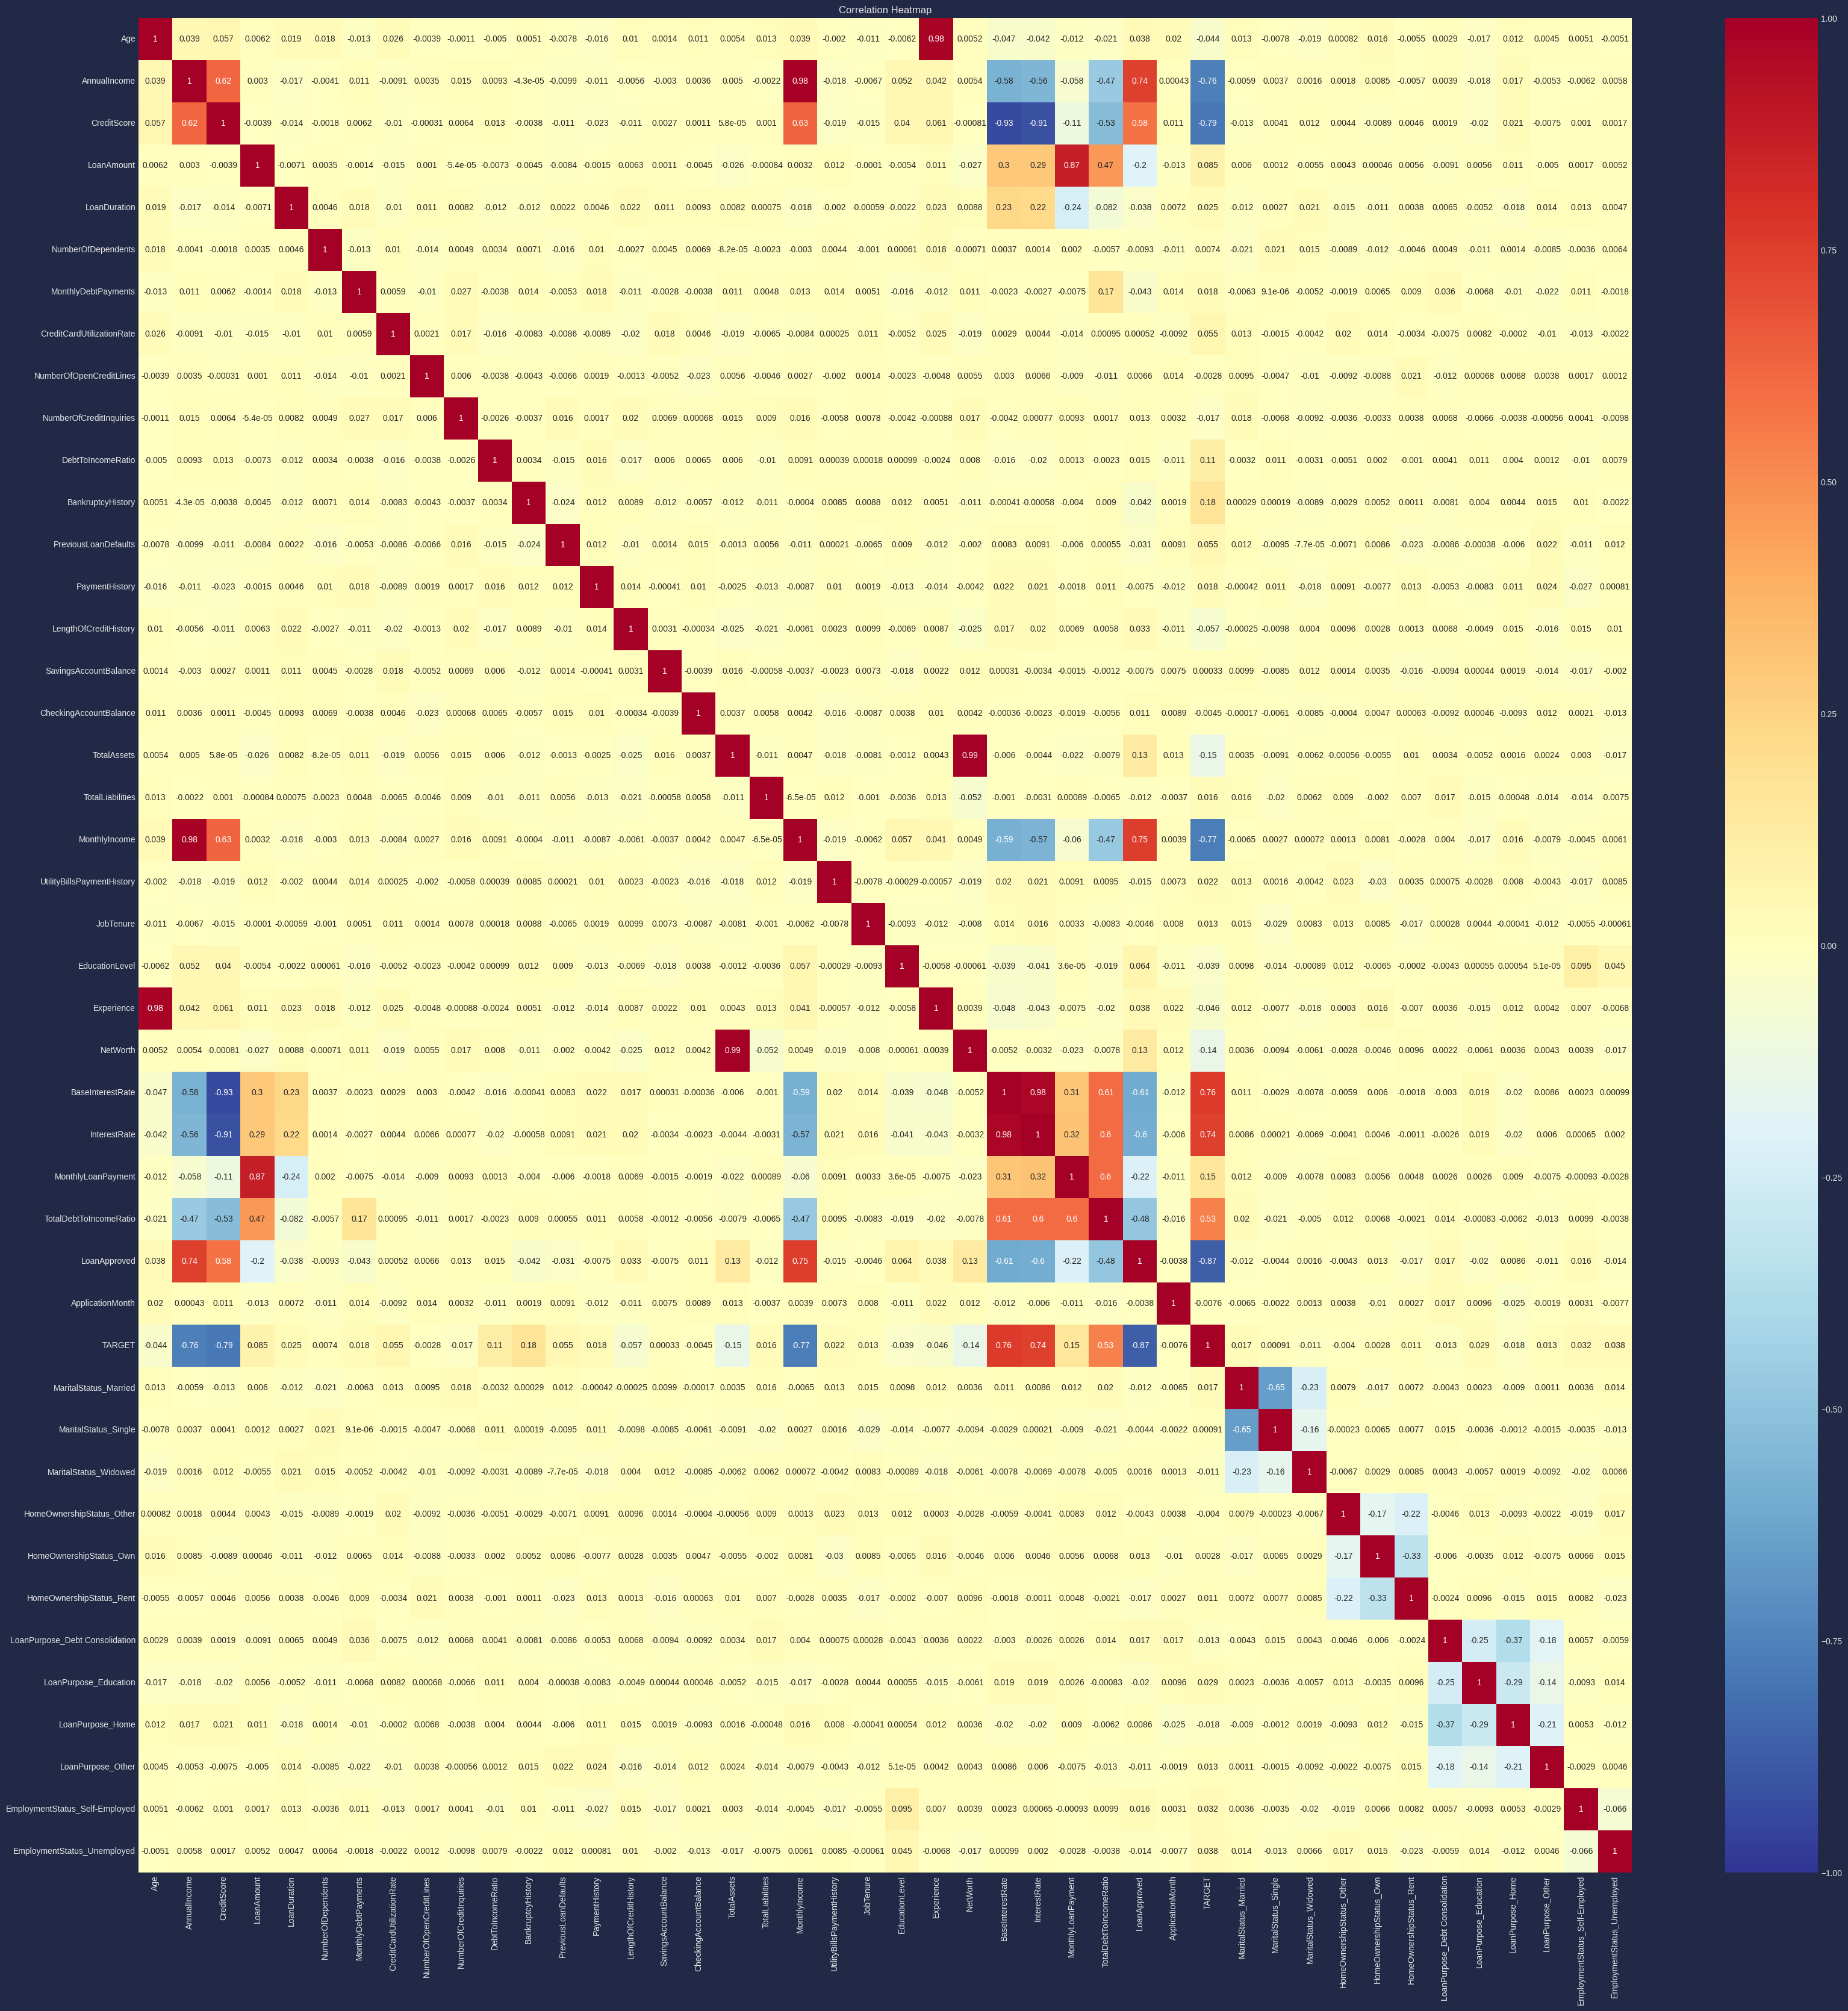

In [685]:
plt.figure(figsize = (40, 40))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

In [686]:
def highly_correlated_features(df, threshold=0.8):
    data_corr = df.corr()
    corr_matrix = data_corr[(data_corr >= threshold) & (data_corr != 1.0)].stack()
    return corr_matrix
print(highly_correlated_features(train_df))

Age                 Experience           0.982958
AnnualIncome        MonthlyIncome        0.984978
LoanAmount          MonthlyLoanPayment   0.872616
TotalAssets         NetWorth             0.993996
MonthlyIncome       AnnualIncome         0.984978
Experience          Age                  0.982958
NetWorth            TotalAssets          0.993996
BaseInterestRate    InterestRate         0.975344
InterestRate        BaseInterestRate     0.975344
MonthlyLoanPayment  LoanAmount           0.872616
dtype: float64


#### Анализ графиков и обработка фичей


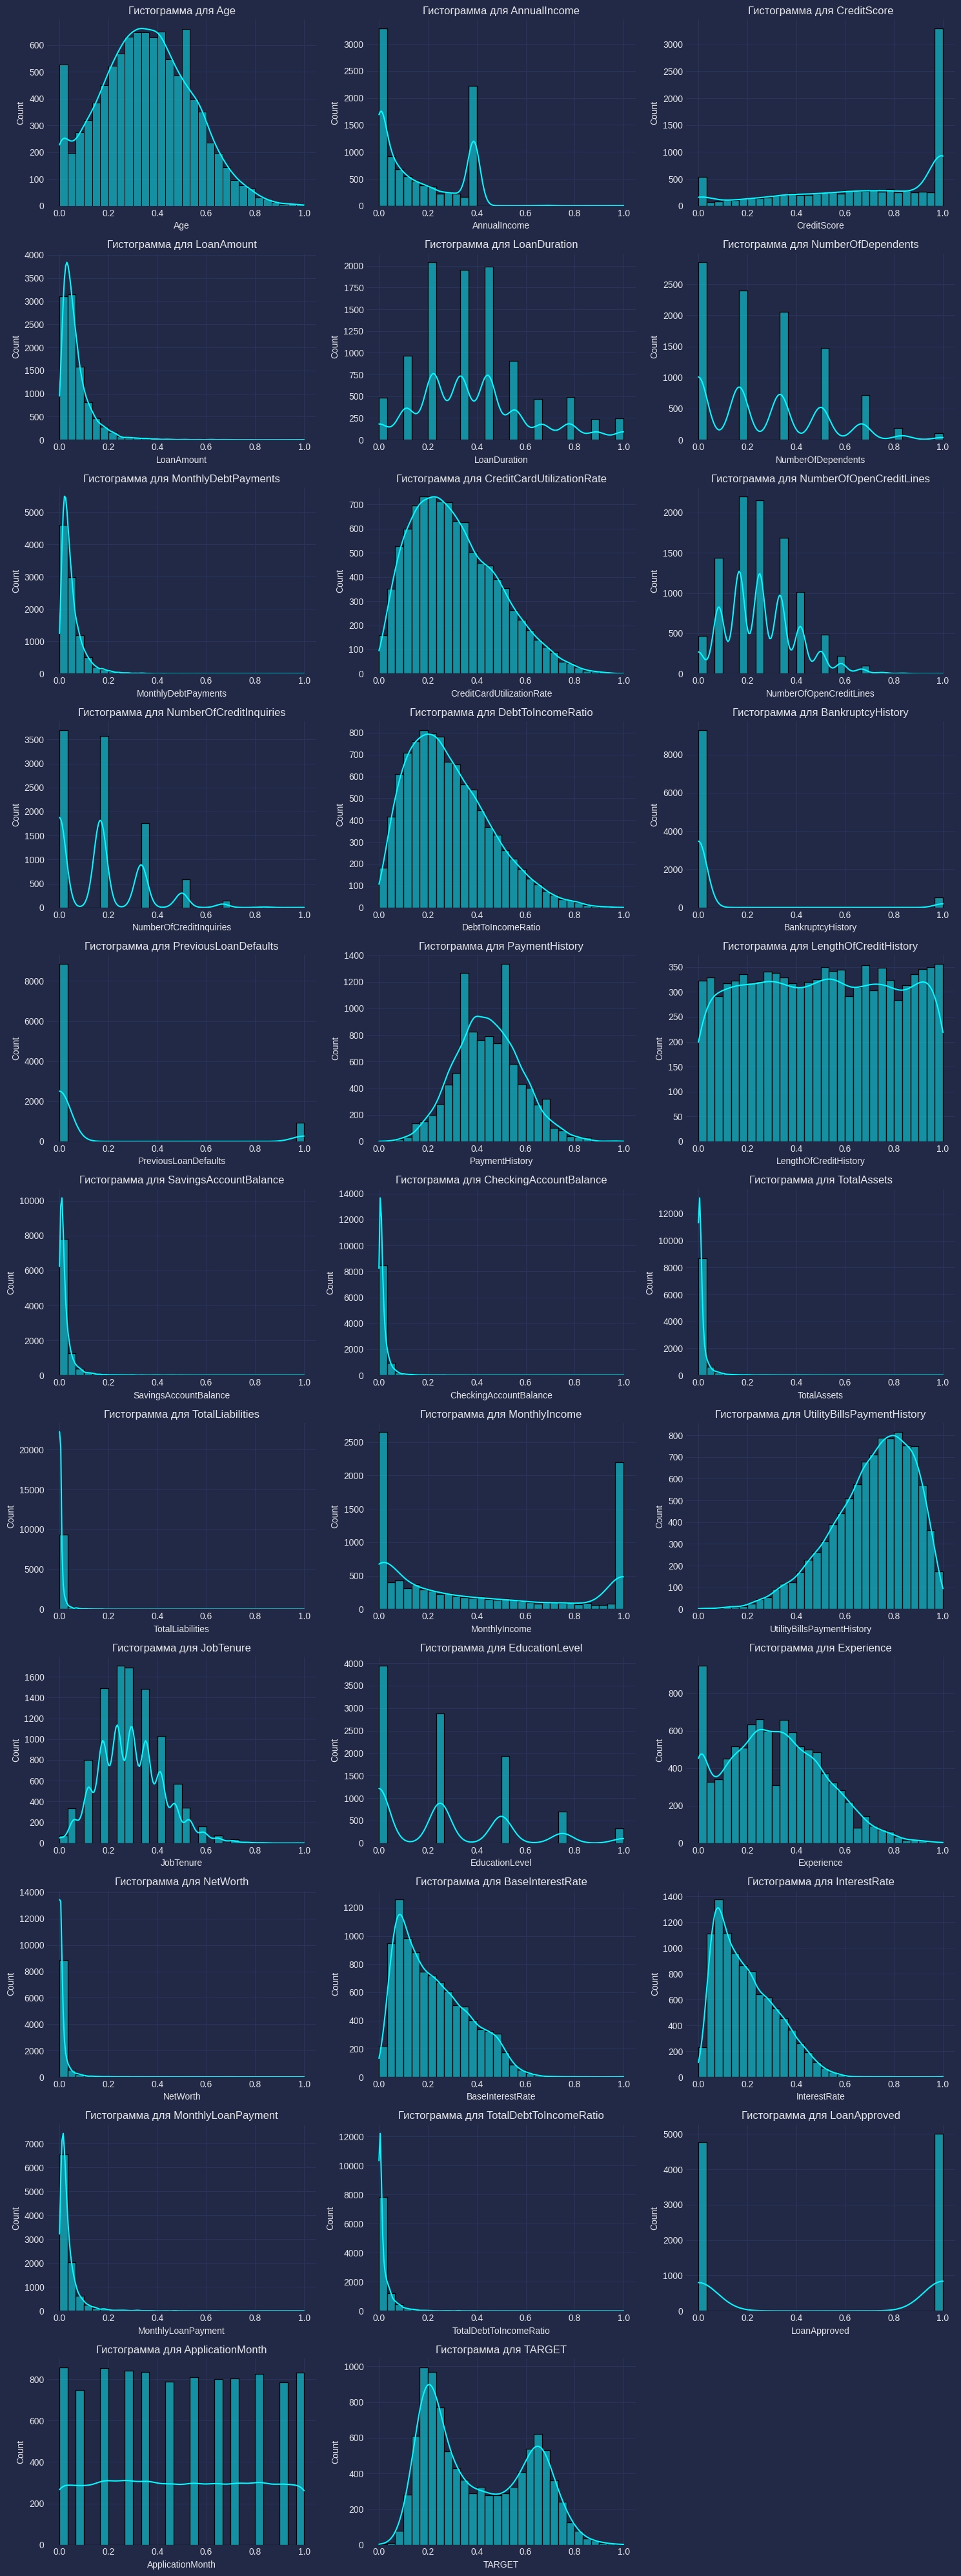

In [687]:
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 40))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f'Гистограмма для {col}')
    plt.tight_layout()

plt.show()

##### Анализ и обработка фичей
---
Начнем с фичей с наибольшей корреляцией с таргетом

In [688]:
# @title Функция анализа
def analyze_column(dataframe, column_name):
    # Проверка, существует ли столбец
    if column_name not in dataframe.columns:
        raise ValueError(f"Столбец '{column_name}' не найден в DataFrame.")

    # Извлечение данных из столбца
    column_data = dataframe[column_name]

    # Вычисление максимального, минимального и медианного значения
    max_value = column_data.max()
    min_value = column_data.min()
    median_value = column_data.median()
    # Вычисление процентилей
    percentiles = column_data.quantile([0.25, 0.5, 0.75])

    # Определение выбросов (например, через 1.5 * IQR)
    Q1 = percentiles[0.25]
    Q3 = percentiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Вычисление процента выбросов
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage = (len(outliers) / len(column_data)) * 100

    # Уникальные значения
    unique_values = column_data.unique()

    # Распределение количества строк
    value_counts = column_data.value_counts().sort_index(ascending=False)

    # Вывод результатов
    print(f"Столбец: {column_name}")
    print(f"Максимальное значение: {max_value}")
    print(f"Медиана: {median_value}")
    print(f"Минимальное значение: {min_value}")
    print(f"Дискрайб:\n{dataframe[column_name].describe()}")
    print(f"Распределение значений 5 верх:\n{value_counts.head(5)}\n")
    print(f"Распределение значений 5 низ:\n{value_counts.tail(5)}\n")
    print(f'Уникальные значения: {unique_values}')
    print(f"Процент выбросов: {outlier_percentage:.2f}%")

###### 1. BaseInterestRate: Базовая процентная ставка

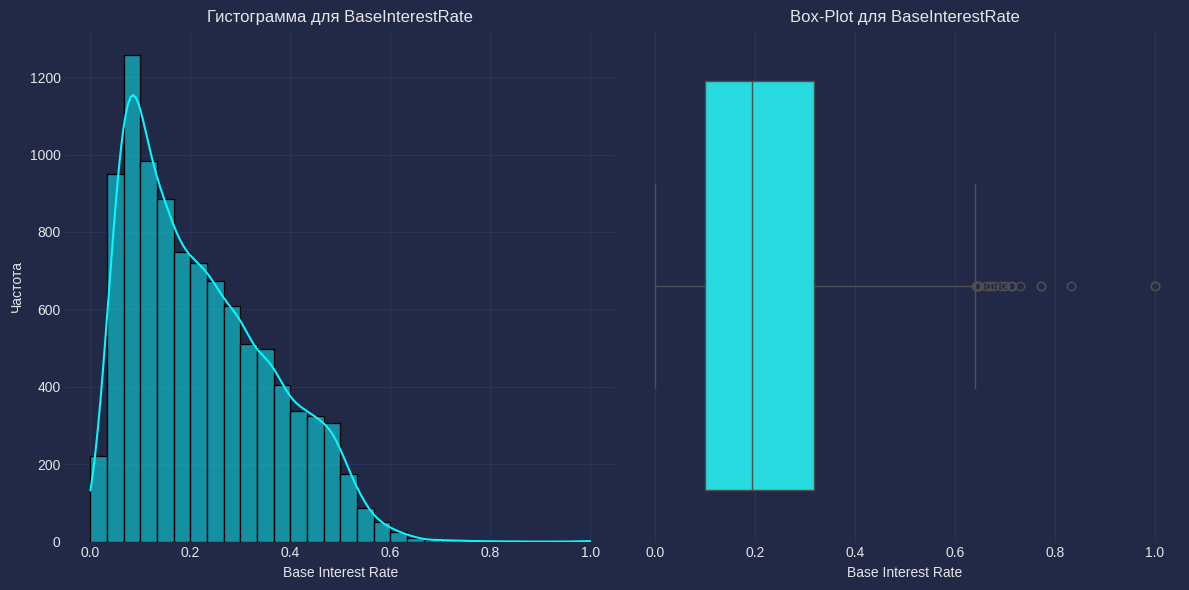

In [689]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['BaseInterestRate'], bins=30, kde=True)
plt.title('Гистограмма для BaseInterestRate')
plt.xlabel('Base Interest Rate')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['BaseInterestRate'])
plt.title('Box-Plot для BaseInterestRate')
plt.xlabel('Base Interest Rate')

plt.tight_layout()
plt.show()

In [690]:
analyze_column(train_df, 'BaseInterestRate')

Столбец: BaseInterestRate
Максимальное значение: 1.0
Медиана: 0.19339913403372821
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.220906
std        0.141134
min        0.000000
25%        0.100549
50%        0.193399
75%        0.317318
max        1.000000
Name: BaseInterestRate, dtype: float64
Распределение значений 5 верх:
BaseInterestRate
1.000000    2
0.832011    1
0.772313    2
0.729301    1
0.713103    1
Name: count, dtype: int64

Распределение значений 5 низ:
BaseInterestRate
0.004278    1
0.003804    1
0.003787    1
0.000731    1
0.000000    1
Name: count, dtype: int64

Уникальные значения: [0.30641057 0.05017291 0.08349515 ... 0.42016379 0.30365983 0.1517426 ]
Процент выбросов: 0.20%


In [691]:
train_df[train_df['BaseInterestRate'] > 0.47].shape[0]

636

In [692]:
train_df[train_df['BaseInterestRate'] < 0.06].shape[0]

924

In [693]:
# train_df = train_df[~((train_df['BaseInterestRate'] > 0.47) | (train_df['BaseInterestRate'] < 0.06))]

###### 2. InterestRate: Применяемая процентная ставка

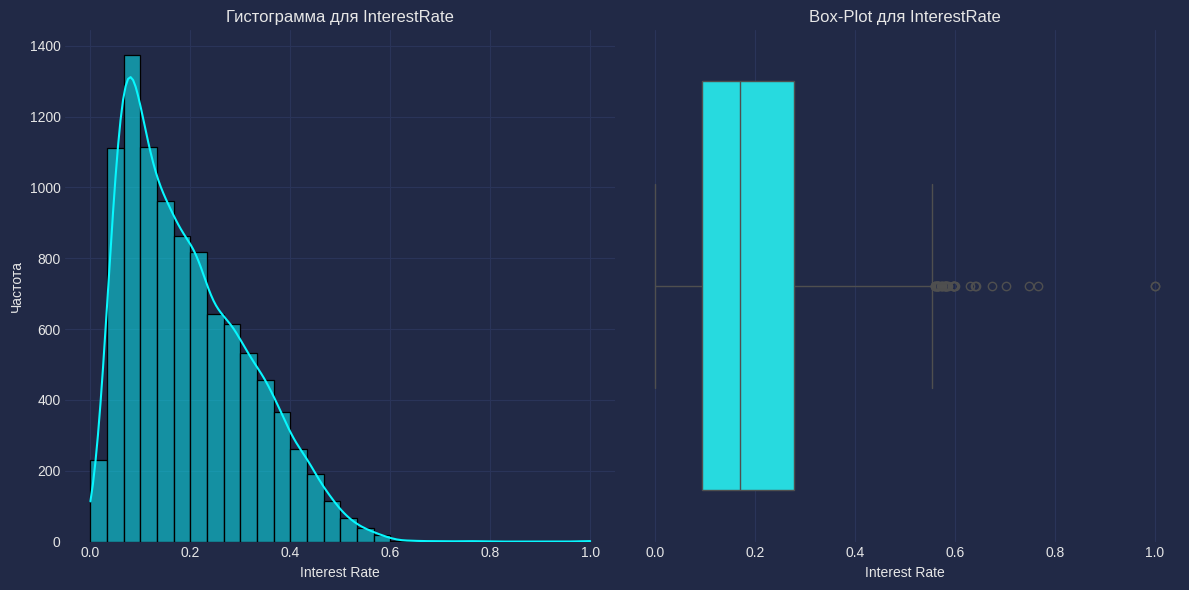

In [694]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['InterestRate'], bins=30, kde=True)
plt.title('Гистограмма для InterestRate')
plt.xlabel('Interest Rate')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['InterestRate'])
plt.title('Box-Plot для InterestRate')
plt.xlabel('Interest Rate')

plt.tight_layout()
plt.show()

In [695]:
analyze_column(train_df, 'InterestRate')

Столбец: InterestRate
Максимальное значение: 1.0
Медиана: 0.17028748112042383
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.195261
std        0.122722
min        0.000000
25%        0.092864
50%        0.170287
75%        0.277829
max        1.000000
Name: InterestRate, dtype: float64
Распределение значений 5 верх:
InterestRate
1.000000    2
0.765888    1
0.747527    1
0.701124    1
0.674437    1
Name: count, dtype: int64

Распределение значений 5 низ:
InterestRate
0.005222    1
0.004640    1
0.002862    1
0.000154    1
0.000000    1
Name: count, dtype: int64

Уникальные значения: [0.26044105 0.05935927 0.08765012 ... 0.23959476 0.12516163 0.13678236]
Процент выбросов: 0.37%


In [696]:
train_df[train_df['InterestRate'] > 0.47].shape[0]

243

In [697]:
train_df[train_df['InterestRate'] < 0.06].shape[0]

1054

In [698]:
# train_df = train_df[~((train_df['InterestRate'] > 0.47) | (train_df['InterestRate'] < 0.06))]

###### 3. TotalDebtToIncomeRatio: Общее соотношение долга к доходу

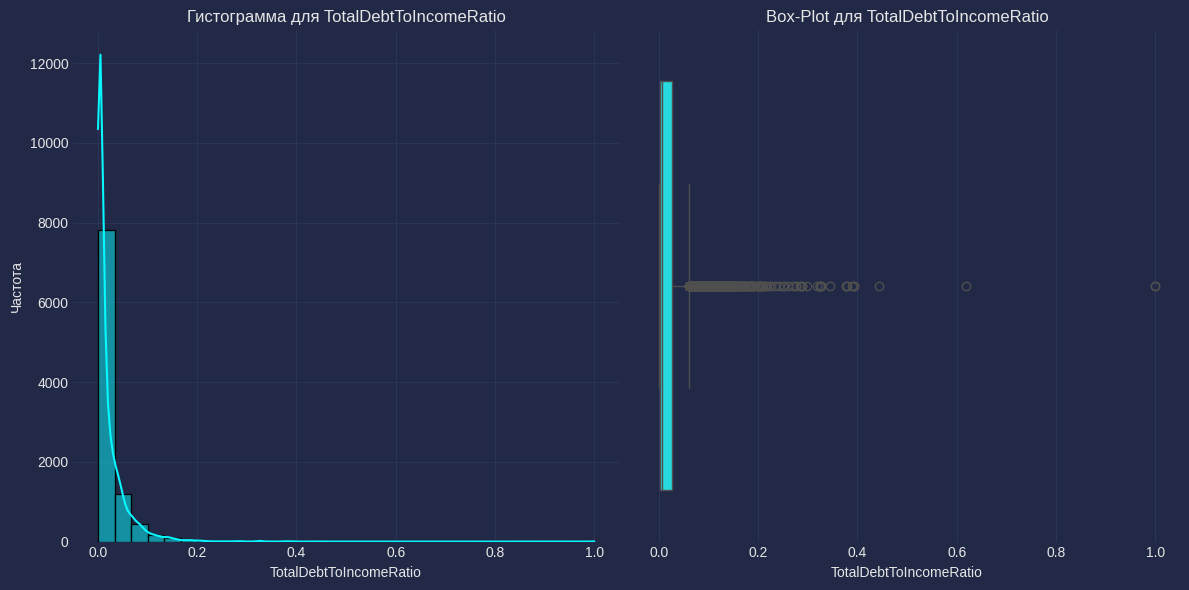

In [699]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['TotalDebtToIncomeRatio'], bins=30, kde=True)
plt.title('Гистограмма для TotalDebtToIncomeRatio')
plt.xlabel('TotalDebtToIncomeRatio')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['TotalDebtToIncomeRatio'])
plt.title('Box-Plot для TotalDebtToIncomeRatio')
plt.xlabel('TotalDebtToIncomeRatio')

plt.tight_layout()
plt.show()

In [700]:
analyze_column(train_df, 'TotalDebtToIncomeRatio')

Столбец: TotalDebtToIncomeRatio
Максимальное значение: 0.9999999999999999
Медиана: 0.007064815492473458
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.021075
std        0.036890
min        0.000000
25%        0.002494
50%        0.007065
75%        0.026065
max        1.000000
Name: TotalDebtToIncomeRatio, dtype: float64
Распределение значений 5 верх:
TotalDebtToIncomeRatio
1.000000    2
0.618793    1
0.444226    1
0.392637    2
0.388581    1
Name: count, dtype: int64

Распределение значений 5 низ:
TotalDebtToIncomeRatio
0.000121    1
0.000118    1
0.000110    1
0.000008    1
0.000000    1
Name: count, dtype: int64

Уникальные значения: [0.0115662  0.00182635 0.00272826 ... 0.00274991 0.00193906 0.00821434]
Процент выбросов: 8.90%


In [701]:
train_df[train_df['TotalDebtToIncomeRatio'] > 4].shape[0]

0

In [702]:
train_df[train_df['TotalDebtToIncomeRatio'] < 0.012].shape[0]

5910

In [703]:
# train_df = train_df[~((train_df['TotalDebtToIncomeRatio'] > 3) | (train_df['TotalDebtToIncomeRatio'] < 0.012))]

###### 4. BankruptcyHistory: История банкротств

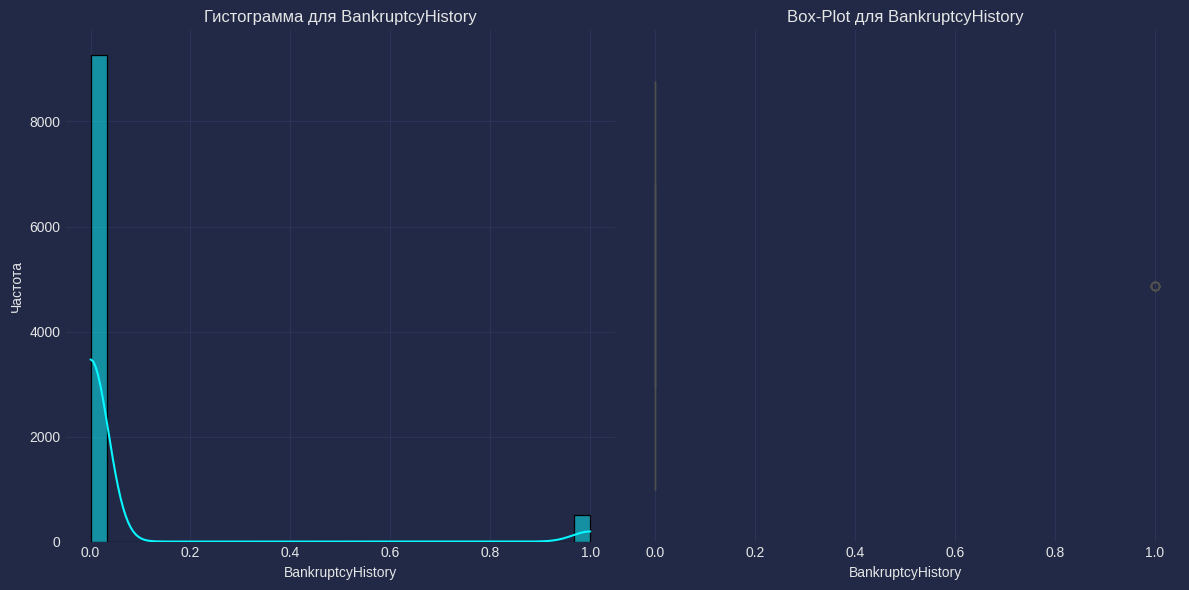

In [704]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['BankruptcyHistory'], bins=30, kde=True)
plt.title('Гистограмма для BankruptcyHistory')
plt.xlabel('BankruptcyHistory')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['BankruptcyHistory'])
plt.title('Box-Plot для BankruptcyHistory')
plt.xlabel('BankruptcyHistory')

plt.tight_layout()
plt.show()

In [705]:
analyze_column(train_df, 'BankruptcyHistory')

Столбец: BankruptcyHistory
Максимальное значение: 1.0
Медиана: 0.0
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.052621
std        0.223287
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: BankruptcyHistory, dtype: float64
Распределение значений 5 верх:
BankruptcyHistory
1.000000     515
0.000000    9272
Name: count, dtype: int64

Распределение значений 5 низ:
BankruptcyHistory
1.000000     515
0.000000    9272
Name: count, dtype: int64

Уникальные значения: [0. 1.]
Процент выбросов: 5.26%


###### 5. MonthlyLoanPayment: Ежемесячный платеж по кредиту

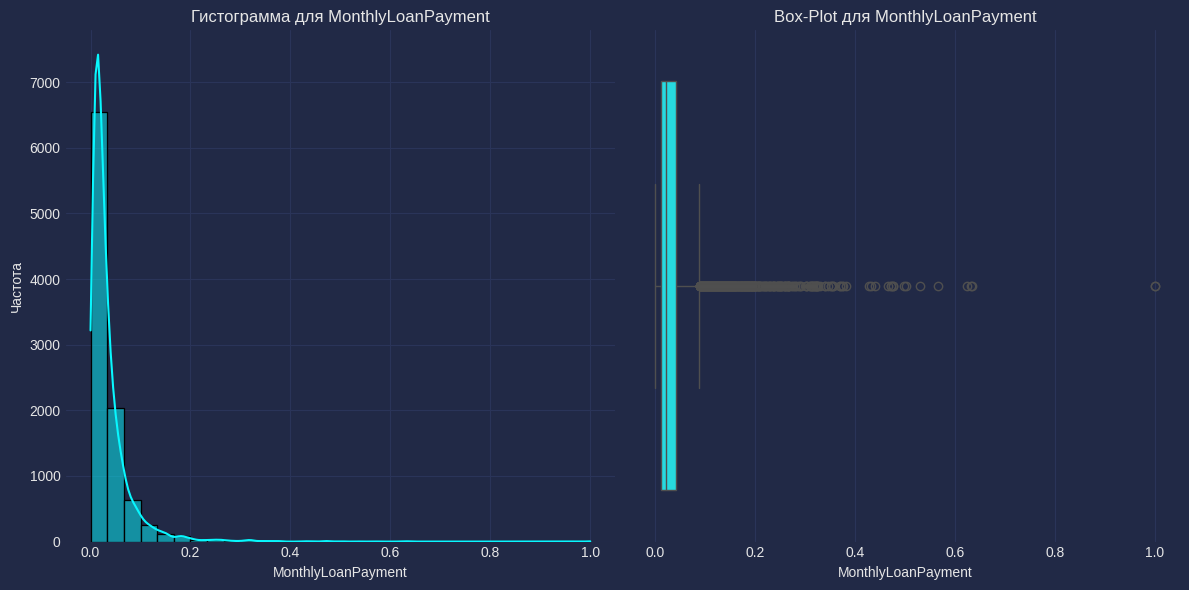

In [706]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['MonthlyLoanPayment'], bins=30, kde=True)
plt.title('Гистограмма для MonthlyLoanPayment')
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['MonthlyLoanPayment'])
plt.title('Box-Plot для MonthlyLoanPayment')
plt.xlabel('MonthlyLoanPayment')

plt.tight_layout()
plt.show()

In [707]:
analyze_column(train_df, 'MonthlyLoanPayment')

Столбец: MonthlyLoanPayment
Максимальное значение: 0.9999999999999999
Медиана: 0.022149586819250267
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.035466
std        0.045793
min        0.000000
25%        0.011651
50%        0.022150
75%        0.042393
max        1.000000
Name: MonthlyLoanPayment, dtype: float64
Распределение значений 5 верх:
MonthlyLoanPayment
1.000000    2
0.634705    1
0.631583    1
0.622871    1
0.566261    1
Name: count, dtype: int64

Распределение значений 5 низ:
MonthlyLoanPayment
0.000567    1
0.000507    1
0.000344    1
0.000229    1
0.000000    1
Name: count, dtype: int64

Уникальные значения: [0.01617852 0.01637124 0.04182659 ... 0.00511506 0.02735253 0.04451405]
Процент выбросов: 7.49%


In [708]:
train_df[train_df['MonthlyLoanPayment'] > 5000].shape[0]

0

In [709]:
train_df[train_df['MonthlyLoanPayment'] < 100].shape[0]

9787

In [710]:
# train_df = train_df[~((train_df['MonthlyLoanPayment'] > 5000) | (train_df['MonthlyLoanPayment'] < 100))]

###### 6. DebtToIncomeRatio: Соотношение долга к доходу

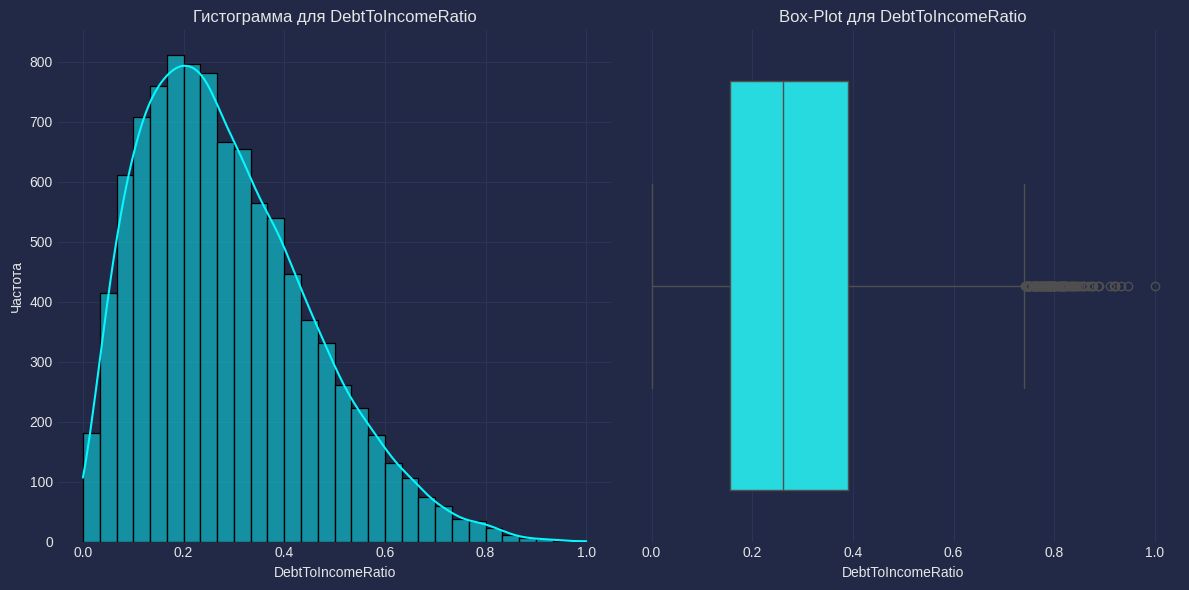

In [711]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['DebtToIncomeRatio'], bins=30, kde=True)
plt.title('Гистограмма для DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['DebtToIncomeRatio'])
plt.title('Box-Plot для DebtToIncomeRatio')
plt.xlabel('DebtToIncomeRatio')

plt.tight_layout()
plt.show()

In [712]:
analyze_column(train_df, 'DebtToIncomeRatio')

Столбец: DebtToIncomeRatio
Максимальное значение: 1.0
Медиана: 0.2603511623960564
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.286074
std        0.167406
min        0.000000
25%        0.156582
50%        0.260351
75%        0.390499
max        1.000000
Name: DebtToIncomeRatio, dtype: float64
Распределение значений 5 верх:
DebtToIncomeRatio
1.000000    1
0.946005    1
0.932191    1
0.920409    1
0.920083    1
Name: count, dtype: int64

Распределение значений 5 низ:
DebtToIncomeRatio
0.004110    1
0.003482    1
0.002875    2
0.000839    1
0.000000    1
Name: count, dtype: int64

Уникальные значения: [0.19164481 0.16035658 0.03218143 ... 0.05462538 0.41713942 0.38306662]
Процент выбросов: 1.10%


In [713]:
train_df[train_df['DebtToIncomeRatio'] > 0.67].shape[0]

239

In [714]:
# train_df = train_df[~(train_df['DebtToIncomeRatio'] > 0.67)]

###### 7. LoanApproved: Статус одобрения кредита

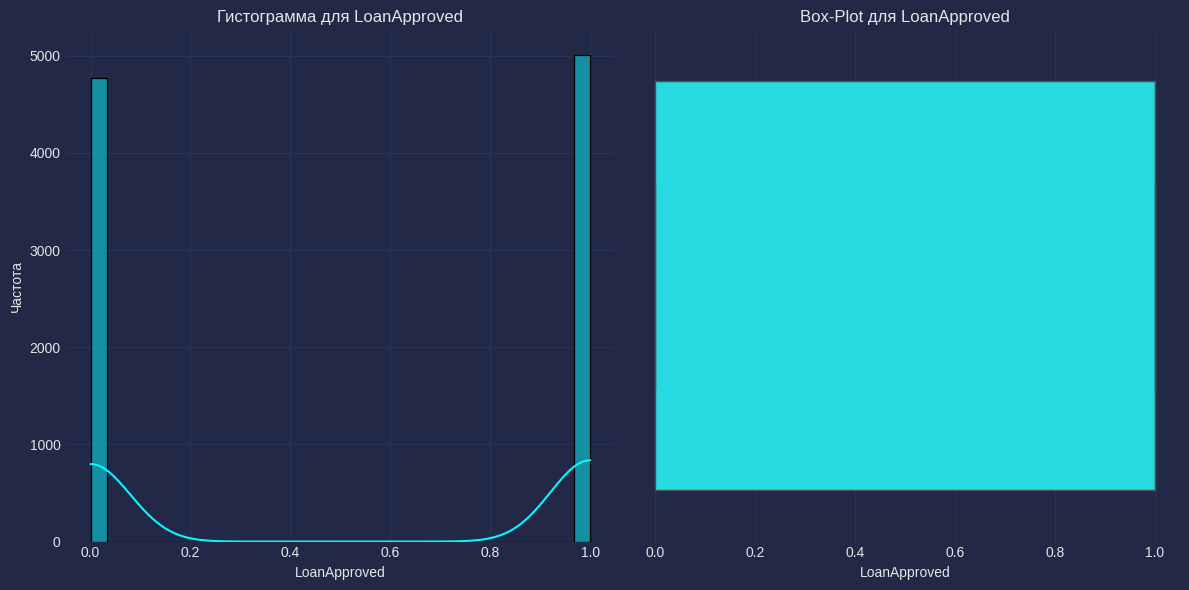

In [715]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['LoanApproved'], bins=30, kde=True)
plt.title('Гистограмма для LoanApproved')
plt.xlabel('LoanApproved')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['LoanApproved'])
plt.title('Box-Plot для LoanApproved')
plt.xlabel('LoanApproved')

plt.tight_layout()
plt.show()

###### 8. CreditScore: Оценка кредитоспособности

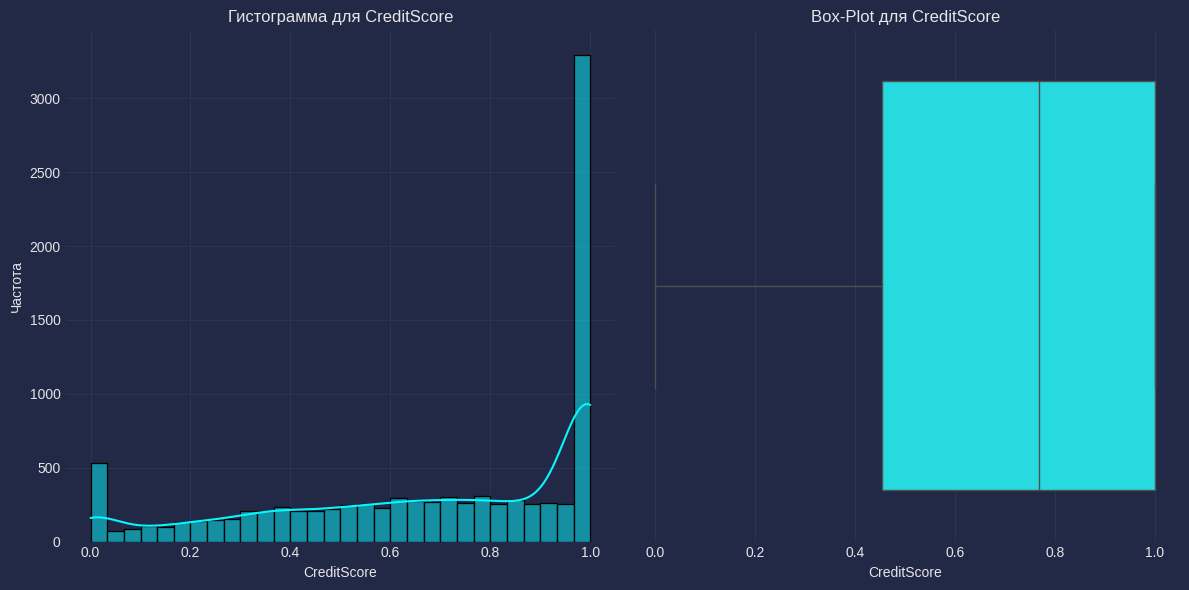

In [716]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['CreditScore'], bins=30, kde=True)
plt.title('Гистограмма для CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['CreditScore'])
plt.title('Box-Plot для CreditScore')
plt.xlabel('CreditScore')

plt.tight_layout()
plt.show()

In [717]:
analyze_column(train_df, 'CreditScore')

Столбец: CreditScore
Максимальное значение: 1.0
Медиана: 0.7672727272727273
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.687112
std        0.318862
min        0.000000
25%        0.454545
50%        0.767273
75%        1.000000
max        1.000000
Name: CreditScore, dtype: float64
Распределение значений 5 верх:
CreditScore
1.000000    3045
0.998182       9
0.996364      13
0.994545      18
0.992727      15
Name: count, dtype: int64

Распределение значений 5 низ:
CreditScore
0.007273      2
0.005455      5
0.003636      3
0.001818      2
0.000000    475
Name: count, dtype: int64

Уникальные значения: [0.45272727 1.         0.99454545 0.         0.54545455 0.18727273
 0.67090909 0.86181818 0.86363636 0.10909091 0.60363636 0.99090909
 0.44545455 0.41454545 0.79090909 0.31818182 0.80909091 0.96909091
 0.78727273 0.40727273 0.24       0.62181818 0.86545455 0.83818182
 0.14909091 0.97454545 0.84181818 0.76545455 0.73272727 0.58363636
 0.15818182 0.59272727 0.75454545 

###### 9. MonthlyIncome: Ежемесячный доход

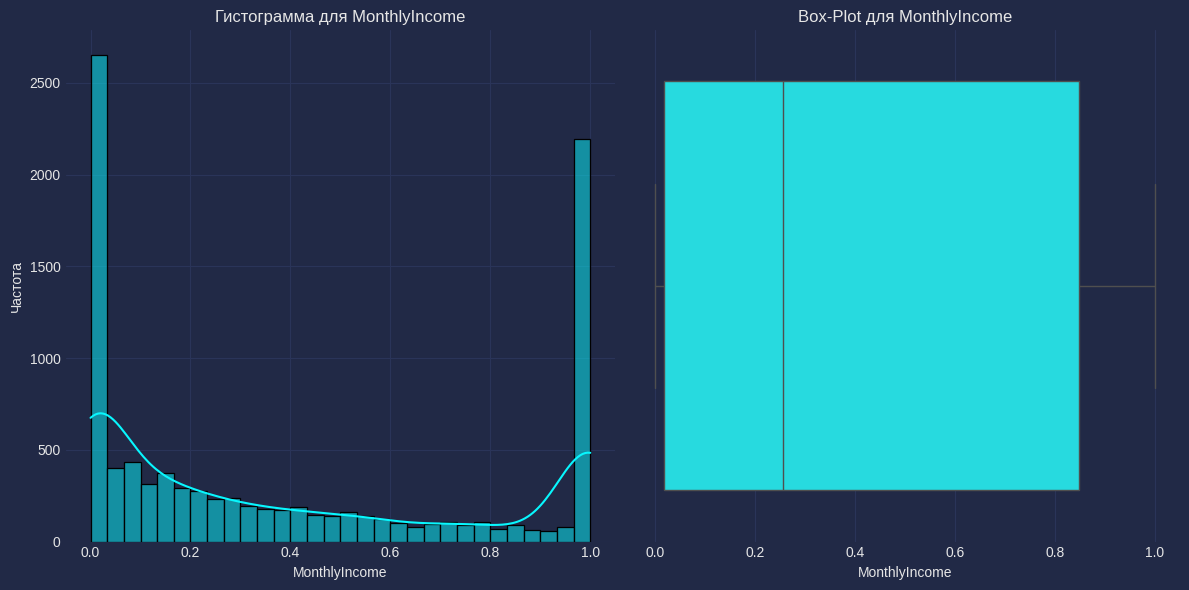

In [718]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['MonthlyIncome'], bins=30, kde=True)
plt.title('Гистограмма для MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['MonthlyIncome'])
plt.title('Box-Plot для MonthlyIncome')
plt.xlabel('MonthlyIncome')

plt.tight_layout()
plt.show()

In [719]:
analyze_column(train_df, 'MonthlyIncome')

Столбец: MonthlyIncome
Максимальное значение: 0.9999999999999999
Медиана: 0.25641754385964916
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.403435
std        0.395745
min        0.000000
25%        0.017547
50%        0.256418
75%        0.847747
max        1.000000
Name: MonthlyIncome, dtype: float64
Распределение значений 5 верх:
MonthlyIncome
1.000000    2124
0.999870       1
0.999586       1
0.999116       1
0.997705       1
Name: count, dtype: int64

Распределение значений 5 низ:
MonthlyIncome
0.000168       2
0.000116       1
0.000102       1
0.000025       1
0.000000    2222
Name: count, dtype: int64

Уникальные значения: [0.18185614 0.55139298 1.         ... 0.59677895 0.9885193  0.25347368]
Процент выбросов: 0.00%


###### 10. AnnualIncome: Годовой доход

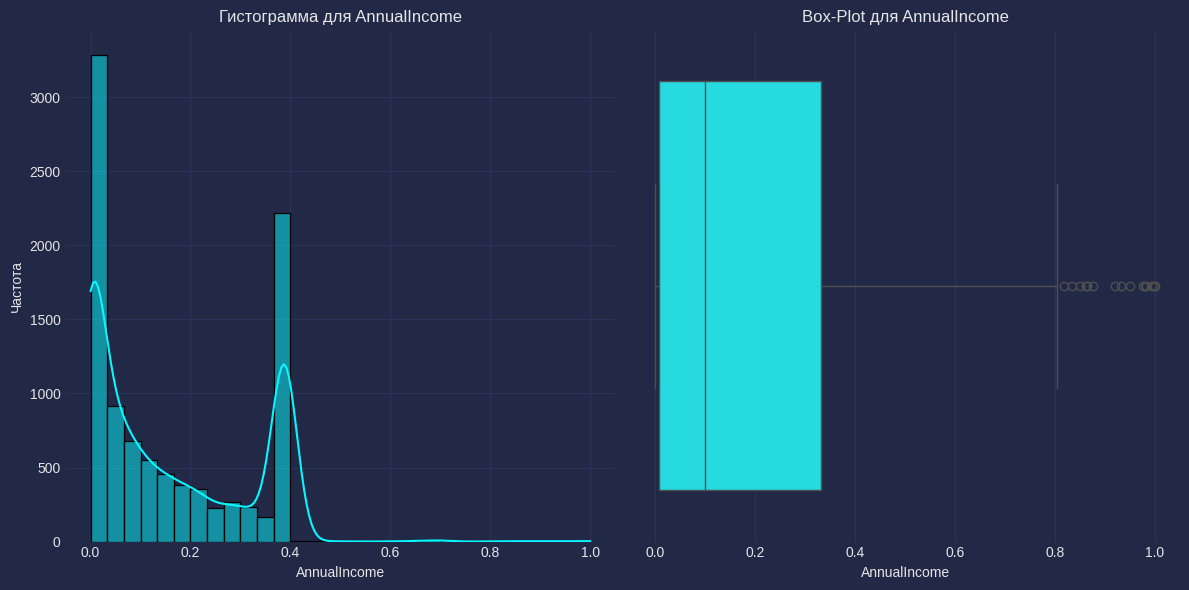

In [720]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['AnnualIncome'], bins=30, kde=True)
plt.title('Гистограмма для AnnualIncome')
plt.xlabel('AnnualIncome')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['AnnualIncome'])
plt.title('Box-Plot для AnnualIncome')
plt.xlabel('AnnualIncome')

plt.tight_layout()
plt.show()

In [721]:
analyze_column(train_df, 'AnnualIncome')

Столбец: AnnualIncome
Максимальное значение: 1.0
Медиана: 0.10036018693729311
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.158864
std        0.158238
min        0.000000
25%        0.007770
50%        0.100360
75%        0.330985
max        1.000000
Name: AnnualIncome, dtype: float64
Распределение значений 5 верх:
AnnualIncome
1.000000    1
0.998971    1
0.993599    1
0.982953    1
0.980304    1
Name: count, dtype: int64

Распределение значений 5 низ:
AnnualIncome
0.000065       2
0.000045       1
0.000040       1
0.000010       1
0.000000    2194
Name: count, dtype: int64

Уникальные значения: [0.07065908 0.21424034 0.38854382 ... 0.23187477 0.38408306 0.09848563]
Процент выбросов: 0.15%


In [722]:
train_df[train_df['AnnualIncome'] > 500000].shape[0]

0

In [723]:
# train_df = train_df[~((train_df['AnnualIncome'] > 500000))]

###### 11. TotalAssets: Общая стоимость активов

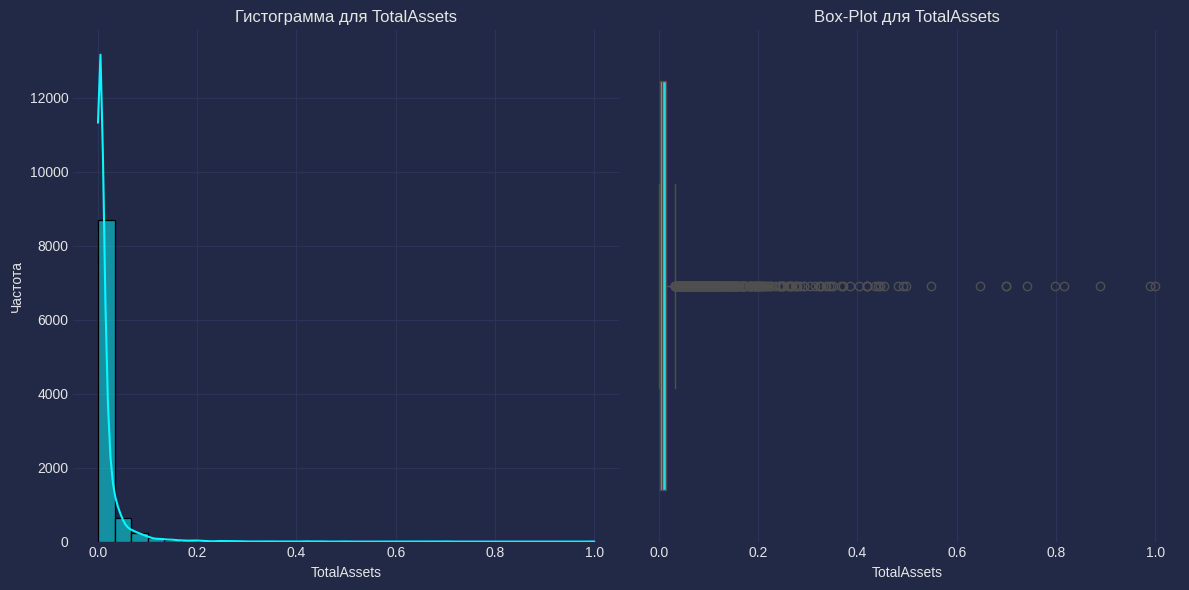

In [724]:
# @title Графики распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train_df['TotalAssets'], bins=30, kde=True)
plt.title('Гистограмма для TotalAssets')
plt.xlabel('TotalAssets')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['TotalAssets'])
plt.title('Box-Plot для TotalAssets')
plt.xlabel('TotalAssets')

plt.tight_layout()
plt.show()

In [725]:
analyze_column(train_df, 'TotalAssets')

Столбец: TotalAssets
Максимальное значение: 1.0
Медиана: 0.005268162026234154
Минимальное значение: 0.0
Дискрайб:
count   9787.000000
mean       0.016078
std        0.041332
min        0.000000
25%        0.001966
50%        0.005268
75%        0.014201
max        1.000000
Name: TotalAssets, dtype: float64
Распределение значений 5 верх:
TotalAssets
1.000000    1
0.989461    1
0.887848    1
0.816301    1
0.799077    1
Name: count, dtype: int64

Распределение значений 5 низ:
TotalAssets
0.000055    1
0.000053    1
0.000044    1
0.000005    1
0.000000    2
Name: count, dtype: int64

Уникальные значения: [0.00435662 0.00806001 0.02581444 ... 0.00487644 0.00167444 0.02098123]
Процент выбросов: 11.42%


In [726]:
train_df[train_df['TotalAssets'] > 1201198].shape[0]

0

In [727]:
train_df[train_df['TotalAssets'] < 3000].shape[0]

9787

In [728]:
# train_df = train_df[~((train_df['TotalAssets'] > 1201198) | (train_df['TotalAssets'] < 3000))]

In [729]:
columns = ['BaseInterestRate', 'InterestRate', 'TotalDebtToIncomeRatio', 'BankruptcyHistory',
           'MonthlyLoanPayment', 'DebtToIncomeRatio', 'LoanApproved', 'CreditScore',
           'MonthlyIncome', 'AnnualIncome', 'TotalAssets', 'ApplicationMonth', 'TARGET']

# Создание таблицы с выбранными колонками
selected_columns_df = train_df[columns]

In [730]:
train_df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'EducationLevel', 'Experience', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'ApplicationMonth', 'TARGET',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other',
       'Empl

### Обучение модели

#### Линейная модель, Ridge регуляризация, подбор гиперпараметра через GridSearchCV

In [731]:
# [0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.13, 0.14, 0.15, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 5]
X = train_df.drop(columns=['TARGET', 'Age', 'InterestRate', 'NetWorth', 'LoanAmount', 'AnnualIncome']) # исключим признаки с меньшей корреляцией с таргетом из высококоррелированных пар
y = train_target_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', GridSearchCV(Ridge(), param_grid={"alpha": [0.15, 0.156, 0.157, 0.158, 0.159, 0.16, 0.164, 0.168, 0.17, 0.18, 0.2]}, cv=5))
])
pipeline.fit(X_train, y_train)
y_pred_scaled = pipeline.predict(X_test)


y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')

best_ridge = pipeline.named_steps['ridge']
print(f'Best Ridge Alpha: {best_ridge.best_params_}')

Mean Squared Error: 12.223826513568497
Best Ridge Alpha: {'alpha': 0.159}


In [732]:
# X = train_df.drop(columns=['TARGET', 'Age', 'InterestRate', 'NetWorth', 'LoanAmount', 'AnnualIncome'])
# y = train_df['TARGET']

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# initial_model = Ridge(alpha=0.0)
# initial_model.fit(X_train, y_train)
# y_val_pred = initial_model.predict(X_val)
# MSE = mean_squared_error(y_val, y_val_pred)

# exponents = np.arange(1, 300)
# lambdas = 10 * 0.90 ** exponents

# best_model = initial_model  # Задаем начальное значение

# for lambda_j in lambdas:
#     ridge_j = Ridge(alpha=lambda_j)
#     ridge_j.fit(X_train, y_train)
#     y_val_pred_j = ridge_j.predict(X_val)
#     MSE_j = mean_squared_error(y_val, y_val_pred_j)
#     if MSE_j < MSE:
#         best_model = ridge_j
#         MSE = MSE_j

# # Проверка на случай отсутствия улучшений
# if best_model is None:
#     print("No model improved over the initial model.")
#     best_model = initial_model

# # Инвертирование и вычисление метрик
# y_train_inv = scaler.inverse_transform(y_train.values.reshape(-1, 1))
# y_val_inv = scaler.inverse_transform(y_val.values.reshape(-1, 1))
# y_test_inv = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# y_train_pred = best_model.predict(X_train)
# y_val_pred = best_model.predict(X_val)
# y_test_pred = best_model.predict(X_test)

# y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
# y_val_pred_inv = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
# y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# print('MSE на тренировочной выборке:', mean_squared_error(y_train_inv, y_train_pred_inv))
# print('MSE на валидационной выборке:', mean_squared_error(y_val_inv, y_val_pred_inv))
# print('MSE на тестовой выборке:', mean_squared_error(y_test_inv, y_test_pred_inv))


In [733]:
# import warnings
# from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Отключение специфических предупреждений
# warnings.filterwarnings("ignore", category=UserWarning)  # Чтобы убрать ConvergenceWarning

# # Разделяем данные на X (признаки) и y (целевую переменную)
# X = train_df.drop(columns=['TARGET', 'ApplicationDate', 'LoanPurpose_Other', 'JobTenure', 'HomeOwnershipStatus_Rent', 'NumberOfDependents',
#                            'HomeOwnershipStatus_Own', 'MaritalStatus_Single', 'SavingsAccountBalance', 'NumberOfOpenCreditLines', 'HomeOwnershipStatus_Other',
#                            'CheckingAccountBalance', 'ApplicationMonth', 'MaritalStatus_Widowed', 'EducationLevel_Bachelor', 'LoanPurpose_Debt Consolidation'])
# y = train_df['TARGET']

# # X = selected_columns_df.drop(columns=['TARGET'])
# # y = selected_columns_df['TARGET']

# # Разделяем данные на обучающую и тестовую выборки (80% на обучение, 20% на тест)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Ridge
# ridge_model = Ridge(alpha=1/10).fit(X_train, y_train)
# y_pred_ridge = ridge_model.predict(X_test)

# mse_ridge = mean_squared_error(y_test, y_pred_ridge)
# # r2_ridge = r2_score(y_test, y_pred_ridge)
# print(f'Ridge - Mean Squared Error: {mse_ridge}')
# # print(f'Ridge - R-squared: {r2_ridge}')

# # # Lasso
# # lasso_model = Lasso(alpha=1/4).fit(X_train, y_train)
# # y_pred_lasso = lasso_model.predict(X_test)

# # mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# # r2_lasso = r2_score(y_test, y_pred_lasso)
# # print(f'Lasso - Mean Squared Error: {mse_lasso}')
# # print(f'Lasso - R-squared: {r2_lasso}')

# # # ElasticNet
# # elasticNet_model = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)
# # y_pred_elasticNet = elasticNet_model.predict(X_test)

# # mse_elasticNet = mean_squared_error(y_test, y_pred_elasticNet)
# # r2_elasticNet = r2_score(y_test, y_pred_elasticNet)
# # print(f'ElasticNet - Mean Squared Error: {mse_elasticNet}')
# # print(f'ElasticNet - R-squared: {r2_elasticNet}')

# # # Линейная регрессия без регуляризации
# # model = LinearRegression().fit(X_train, y_train)
# # y_pred = model.predict(X_test)

# # # Оценка качества модели линейной регрессии
# # mse = mean_squared_error(y_test, y_pred)
# # r2 = r2_score(y_test, y_pred)
# # print(f'Linear Regression - Mean Squared Error: {mse}')
# # print(f'Linear Regression - R-squared: {r2}')


### Finally, предиктим на тесте и выкидываем сабмисабмит файл

In [734]:
test_df_2 = test_df.drop(columns=['Age', 'InterestRate', 'NetWorth', 'LoanAmount', 'AnnualIncome'])
X_test_final = test_df_2
y_test_pred = pipeline.predict(X_test_final)
y_test_pred_inv = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
results_df = pd.DataFrame({'ID': test_id, 'RiskScore': y_test_pred_inv})

results_df.to_csv('submission.csv', index=False)